# Laboratorium 1


Importy bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Zadanie 1 - sumowanie liczb pojedyńczej precyzji

### Zadanie 1.1

Sumowanie poprzez mnożenie - tablica zapełniona tą samą wartością

In [2]:
def multiSum(x, n = 10**7):
    return np.float32(x * n)

In [3]:
x1 = 0.53125
n = 10 ** 7
correct_sum =multiSum(x1)

Sumowanie interacyjne - sumowanie elementów tablicy iteracyjnie

In [4]:
def iterSum(tab):
    result = np.float32(0)

    for i in range(len(tab)):
        result += tab[i]
    
    return result

Stworzenie tablicy z każdą komórką równą x1

In [5]:
tab1 = np.full(n, x1, dtype=np.float32)

In [6]:
iter_sum1 = iterSum(tab1)

### Zadanie 1.2

#### Błąd bezwzględny obliczeń

In [7]:
def absoluteError(a, b):
    return np.absolute(a - b)

Błąd bezwzględny algorytmu iteracyjnego z rzeczywistą wartością

In [8]:
print(absoluteError(iter_sum1, correct_sum))

281659.5


#### Błąd względny obliczeń

In [9]:
# a - real value
def relativeError(a, b):
    return np.absolute((a - b) / a)

Błąd względny algorytmu iteracyjnego z rzeczywistą wartością

In [10]:
print(relativeError(correct_sum, iter_sum1))

0.053018257


### Zadanie 1.3

In [11]:
def searchRelativeError(tab):

    suma = np.float32(tab[0])
    relative_errors = []
    y_axis = []
    for i in range(1, len(tab)):
        suma += tab[i]
        if i % 25000 == 0:
            relative_errors.append(relativeError(multiSum(tab[i], n = i ), suma))
            y_axis.append(i)
    
    return y_axis, relative_errors

In [12]:
x_axis, y_axis = searchRelativeError(tab1)

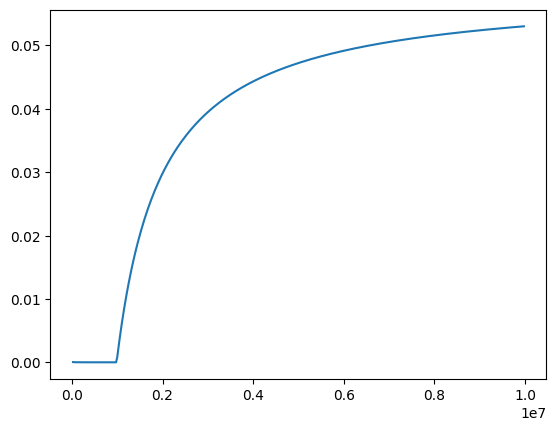

In [13]:
plt.plot(x_axis, y_axis)
plt.show()

In [14]:
# TODO miejsce na interpretację wykresu

### Zadanie 1.4 - alg sumowania rekurencyjnie

In [15]:
# def recSum(tab, p, q):
#     if p > q:
#         return
#     if p == q:
#         return tab[p]
#     r = (p + q)//2
#     x1 = recSum(tab, p, r)
#     x2 = recSum(tab, r+1, q)
#     return x1 + x2


def recSum(tab):
    if len(tab) == 1:
        return tab[0]
    
    r = len(tab) // 2
    p = tab[:r]
    q = tab[r:]

    x = recSum(p)
    y = recSum(q)
    
    return x + y

# suma = np.float32(0.0)
# def recSum1(tab, p, q):
#     if p > q:
#         return 
#     r = (q + p) // 2
#     recSum1(tab, p, r)
#     recSum1(tab, r+1, q)
#     suma += tab[]
    

### Zadanie 1.5 - błąd względny i bezwzględny dla alg rekurencyjnego

Wartość bezwzględna dla algortymu rekurencyjnego 

In [16]:
rec_sum1 = recSum(tab1)

In [17]:
print(absoluteError(rec_sum1 , correct_sum))

0.0


In [18]:
print(relativeError(rec_sum1, correct_sum))

0.0


In [19]:
# TODO napisać dlaczego błąd względny znacznie zmalał - ELO

### Zadanie 1.6 - porównywanie czasu działania algorytmów

In [20]:
time_s = time.process_time()
iterSum(tab1)
iter_time = time.process_time() - time_s

time_s = time.process_time()
recSum(tab1)
rec_time = time.process_time() - time_s

print(f"Iterative algorithm: {iter_time}")
print(f"Recursive algorithm: {rec_time}")


Iterative algorithm: 1.3978801230000002
Recursive algorithm: 5.968261646


### Zadanie 1.7 - przykładowe dane, przy których alg rekurencyjny zwraca niezerowy błąd względny

Są to dane posortowane w sposób niemalejący, gdzie pierwsza liczba jest bardzo duża, a ostatnia bardzo mała.

## Zadanie 2

### Zadanie 2.0 - algorytm Kahana

In [21]:
def kahan(tab):
    suma = np.float32(0)
    err = np.float32(0)

    for i in range(len(tab)):
        y = np.float32(tab[i]) - err 
        temp = suma + y
        err = (temp - suma) - y
        suma = temp
    return suma

### Zadanie 2.1

In [22]:
kahan_sum1 = kahan(tab1)


In [23]:
print(correct_sum)
print(iter_sum1)
print(rec_sum1)
print(kahan_sum1)

5312500.0
5030840.5
5312500.0
5312500.0


In [24]:
print(absoluteError(kahan_sum1 , correct_sum))


0.0


In [25]:
print(absoluteError(kahan_sum1 , correct_sum))

0.0


In [26]:
tab2 = [np.float32(i//333) for i in range(n, 0, -1)]

In [27]:
correct_sum2 = multiSum(np.float32(15015))

In [28]:
kahan_sum2 = recSum(tab2)

In [29]:
print(absoluteError(correct_sum2, kahan_sum2))

4816896.0


In [30]:
print(relativeError(correct_sum2, kahan_sum2))

3.208056e-05


### Zadanie 2.2

In [31]:
# TODO napisać dlaczego algorytm Kahana ma znacznie lepsze własności numeryczne? Do czego służy zmienna err?

### Zadanie 2.3

In [32]:
time_s = time.process_time()
recSum(tab1)
recur_time = time.process_time() - time_s

time_s = time.process_time()
kahan(tab1)
kahan_time = time.process_time() - time_s

print(f"Recursive algorithm: {recur_time}")
print(f"Kahan algorithm: {kahan_time}")

Recursive algorithm: 6.191094728000003
Kahan algorithm: 6.629824036000002


## Zadanie 3 - sumy częściowe

### Obliczenia dla pojedyńczej precyzji

In [33]:
S = np.array([2, 3.6667, 5, 7.2, 10], dtype=np.float32)
N = (50, 100, 200, 500, 1000)

Funckcja dzeta Riemana w przód

In [34]:
def riemanForward(n : int, s):
    result = np.float32(0)

    for i in range(1, n):
        result += np.float32(1/(i**s))
    
    return result

Funkcja dzeta Riemanna wstecz

In [35]:
def riemanBackward(n : int, s):
    result = np.float32(0)

    for i in range(n-1, 2, -1):
        result += np.float32(1/(i**s))
    
    return result

Funkcja eta Dirichleta w przód

In [36]:
def dirichletForward(n : int, s ):
    result = np.float32(0)

    for i in range(1, n):
        result += np.float32(((-1)**(i-1)) * (1/(i**s)))
    
    return result

Funkcja eta Dirichleta wstecz

In [37]:
def dirichletBackward(n : int, s):
    result = np.float32(0)

    for i in range(n-1, 2, -1):
        result += np.float32(((-1)**(i-1)) * (1/(i**s)))
    
    return result

Sumowanie w przód

In [38]:
funcs = {"dzeta_forward" : [],
         "dzeta_backward" : [],
         "eta_forward" : [],
         "eta_backward" : [],
           }

for i, s in enumerate(S):
    funcs["dzeta_forward"].append([])
    funcs["dzeta_backward"].append([])
    funcs["eta_forward"].append([])
    funcs["eta_backward"].append([])
    for n in N:
        funcs["dzeta_forward"][i].append(riemanForward(n, s))
        funcs["dzeta_backward"][i].append(riemanBackward(n, s))
        funcs["eta_forward"][i].append(dirichletForward(n, s))
        funcs["eta_backward"][i].append(dirichletBackward(n, s))


Funkcja do wyświetlania wyników dla pojedyńczej precyzji.

In [39]:
def printFunctions(func : dict, s, n):

    for key in func.keys():
        print(f"Function {key}:")
        for i, ss in enumerate(s):
            print()
            for j, nn in enumerate(n):
                       print ('s: %(sss)f   n: %(nnn)d    value: %(fun)f' % {"sss" : ss, "nnn" : nn, "fun": func[key][i][j]})
        print()

In [40]:
printFunctions(funcs, S, N)
# for key in funcs.keys():
#     print(funcs[key][0][0])


Function dzeta_forward:

s: 2.000000   n: 50    value: 1.624733
s: 2.000000   n: 100    value: 1.634884
s: 2.000000   n: 200    value: 1.639922
s: 2.000000   n: 500    value: 1.642932
s: 2.000000   n: 1000    value: 1.643934

s: 3.666700   n: 50    value: 1.109399
s: 3.666700   n: 100    value: 1.109409
s: 3.666700   n: 200    value: 1.109409
s: 3.666700   n: 500    value: 1.109409
s: 3.666700   n: 1000    value: 1.109409

s: 5.000000   n: 50    value: 1.036927
s: 5.000000   n: 100    value: 1.036927
s: 5.000000   n: 200    value: 1.036927
s: 5.000000   n: 500    value: 1.036927
s: 5.000000   n: 1000    value: 1.036927

s: 7.200000   n: 50    value: 1.007228
s: 7.200000   n: 100    value: 1.007228
s: 7.200000   n: 200    value: 1.007228
s: 7.200000   n: 500    value: 1.007228
s: 7.200000   n: 1000    value: 1.007228

s: 10.000000   n: 50    value: 1.000995
s: 10.000000   n: 100    value: 1.000995
s: 10.000000   n: 200    value: 1.000995
s: 10.000000   n: 500    value: 1.000995
s: 10.00

### Obliczenia dla podwójnej precyzji

In [41]:
S_DOUBLE = np.array([2, 3.6667, 5, 7.2, 10], dtype=np.float64)
N_DOUBLE = (50, 100, 200, 500, 1000)

Funkcje Reimanna i Dirichleta dla podwójnej precyzji w przód i wstecz

In [42]:
def riemanForwardDouble(n : int, s):
    result = np.float64(0)

    for i in range(1, n+1):
        result += np.float64(1/(i**s))
    
    return result


def riemanBackwardDouble(n : int, s):
    result = np.float64(0)

    for i in range(n, 2, -1):
        result += np.float64(1/(i**s))
    
    return result

def dirichletForwardDouble(n : int, s ):
    result = np.float64(0)

    for i in range(1, n+1):
        result += np.float64(((-1)**(i-1)) * (1/(i**s)))
    
    return result

def dirichletBackwardDouble(n : int, s):
    result = np.float64(0)

    for i in range(n, 2, -1):
        result += np.float64(((-1)**(i-1)) * (1/(i**s)))
    return result

In [43]:
funcs_double = {"dzeta_forward_double" : [],
                "dzeta_backward_double" : [],
                "eta_forward_double" : [],
                "eta_backward_double" : [],
                }

for i, s in enumerate(S_DOUBLE):
    funcs_double["dzeta_forward_double"].append([])
    funcs_double["dzeta_backward_double"].append([])
    funcs_double["eta_forward_double"].append([])
    funcs_double["eta_backward_double"].append([])
    for n in N_DOUBLE:
        funcs_double["dzeta_forward_double"][i].append(riemanForwardDouble(n, s))
        funcs_double["dzeta_backward_double"][i].append(riemanBackwardDouble(n, s))
        funcs_double["eta_forward_double"][i].append(dirichletForwardDouble(n, s))
        funcs_double["eta_backward_double"][i].append(dirichletBackwardDouble(n, s))

Funkcja do wyświetlania wyników dla podwójnej precyzji

In [44]:
def printFunctionsDouble(func : dict, s, n):

    for key in func.keys():
        print(f"Function {key}:")
        for i, ss in enumerate(s):
            print()
            for j, nn in enumerate(n):
                       print ("s: {:.4f}   n: {}     value: {:.15f}".format(ss, nn, func[key][i][j]))
        print()

In [45]:
printFunctionsDouble(funcs_double, S_DOUBLE, N_DOUBLE)

Function dzeta_forward_double:

s: 2.0000   n: 50     value: 1.625132733621529
s: 2.0000   n: 100     value: 1.634983900184892
s: 2.0000   n: 200     value: 1.639946546014997
s: 2.0000   n: 500     value: 1.642936065514894
s: 2.0000   n: 1000     value: 1.643934566681561

s: 3.6667   n: 50     value: 1.109399755154195
s: 3.6667   n: 100     value: 1.109408797342147
s: 3.6667   n: 200     value: 1.109410242333231
s: 3.6667   n: 500     value: 1.109410490844071
s: 3.6667   n: 1000     value: 1.109410510842358

s: 5.0000   n: 50     value: 1.036927716716712
s: 5.0000   n: 100     value: 1.036927752692955
s: 5.0000   n: 200     value: 1.036927754988678
s: 5.0000   n: 500     value: 1.036927755139386
s: 5.0000   n: 1000     value: 1.036927755143122

s: 7.2000   n: 50     value: 1.007227666476282
s: 7.2000   n: 100     value: 1.007227666480654
s: 7.2000   n: 200     value: 1.007227666480714
s: 7.2000   n: 500     value: 1.007227666480714
s: 7.2000   n: 1000     value: 1.007227666480714

s: 1

#### Porównanie wyników pojedyńczej precyzji z podwójną precyzją

In [46]:
def compareErrors(func32 : dict, func64 : dict, s, n):

    ziped_func = list(zip(func32.keys(), func64.keys()))

    for name32, name64 in ziped_func:
        print("func: {}".format(name32))
        for i, ss in enumerate(s):
            print()
            for j, nn in enumerate(n):
                       print ("s: {:.4f}   n: {}     relative error: {:.15f}".format(
                             ss, nn, relativeError(func64[name64][i][j], func32[name32][i][j])))
        print()
        


In [47]:
compareErrors(funcs, funcs_double, S_DOUBLE, N_DOUBLE)

func: dzeta_forward

s: 2.0000   n: 50     relative error: 0.000245987556495
s: 2.0000   n: 100     relative error: 0.000061101739508
s: 2.0000   n: 200     relative error: 0.000015171728254
s: 2.0000   n: 500     relative error: 0.000002512175363
s: 2.0000   n: 1000     relative error: 0.000000410254468

s: 3.6667   n: 50     relative error: 0.000000823234619
s: 3.6667   n: 100     relative error: 0.000000162539268
s: 3.6667   n: 200     relative error: 0.000001465024854
s: 3.6667   n: 500     relative error: 0.000001689027130
s: 3.6667   n: 1000     relative error: 0.000001707053148

s: 5.0000   n: 50     relative error: 0.000000246008051
s: 5.0000   n: 100     relative error: 0.000000280703076
s: 5.0000   n: 200     relative error: 0.000000282917041
s: 5.0000   n: 500     relative error: 0.000000283062382
s: 5.0000   n: 1000     relative error: 0.000000283065985

s: 7.2000   n: 50     relative error: 0.000000007198787
s: 7.2000   n: 100     relative error: 0.000000007203128
s: 7.200

## Zadanie 4 - Błędy zaokrągleń i odwzorowanie logistyczne


#### Zadanie 4.1

In [48]:
%matplotlib inline

In [49]:
def logistic(r, x):
    return r * x * (1 - x)

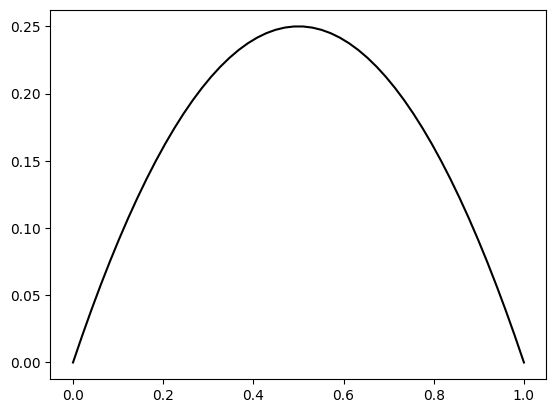

In [50]:
x = np.linspace(0,1)
fig, ax = plt.subplots(1,1)
ax.plot(x, logistic(1, x), 'k')

In [82]:
iterations = 1000
n = 1000
r = np.linspace(1.0, 4.0, n)

visibility = 300
x = [ np.full(n, 0), np.full(n, 1e-5), np.full(n, 0.1), np.full(n, 0.5), np.full(n, 1)]
# x = 1e-5 * np.ones(n)

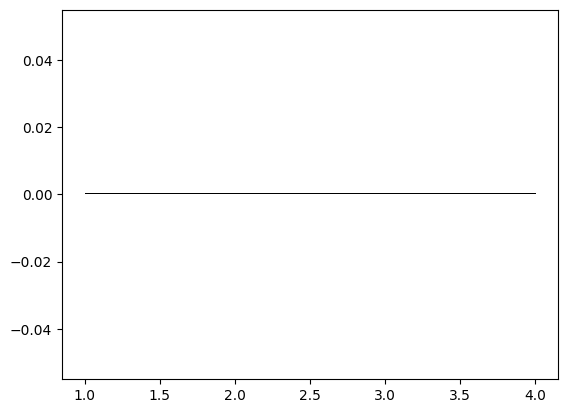

In [83]:
fig, ax1  = plt.subplots(1,1)

for i in range(iterations):
    x[0] = logistic(r, x[0])
    if i >= iterations - visibility:
        ax1.plot(r, x[0], ',k', alpha=0.1)

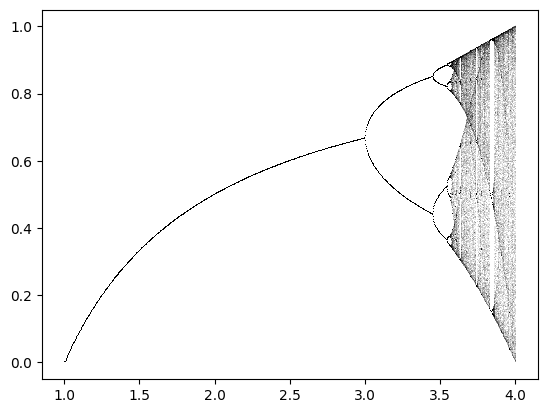

In [84]:
fig, ax2  = plt.subplots(1,1)
for i in range(iterations):
    
    x[1] = logistic(r, x[1])
    if i >= iterations - visibility:
        ax2.plot(r, x[1], ',k', alpha=0.1)


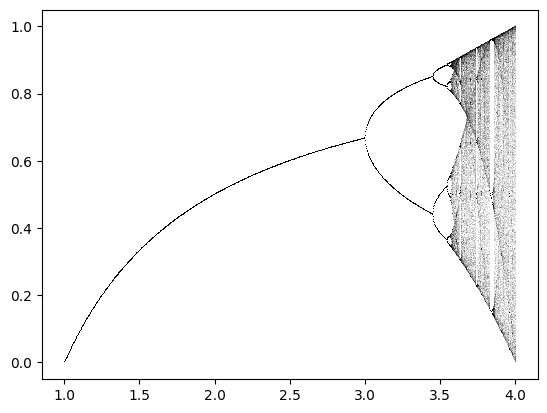

In [85]:
fig, ax3  = plt.subplots(1,1)
for i in range(iterations):
    
    x[2] = logistic(r, x[2])
    if i >= iterations - visibility:
        ax3.plot(r, x[2], ',k', alpha=0.1)

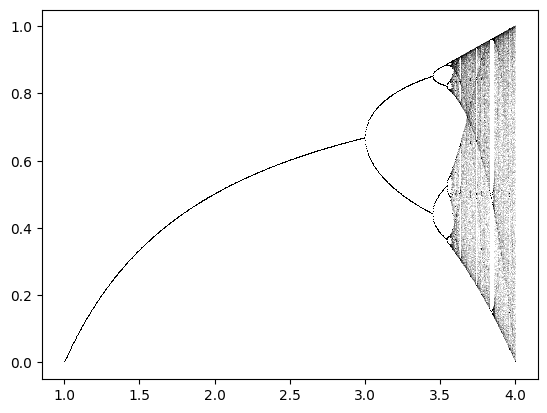

In [86]:
fig, ax4  = plt.subplots(1,1)
for i in range(iterations):
    
    x[3] = logistic(r, x[3])
    if i >= iterations - visibility:
        ax4.plot(r, x[3], ',k', alpha=0.1)

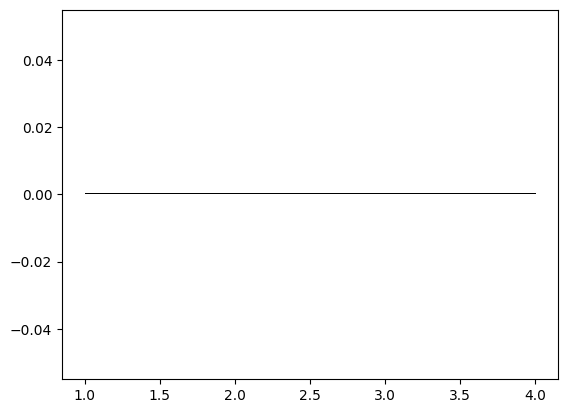

In [87]:
fig, ax5  = plt.subplots(1,1)
for i in range(iterations):
    
    x[4] = logistic(r, x[4])
    if i >= iterations - visibility:
        ax5.plot(r, x[4], ',k', alpha=0.1)

### Zadanie 4.2

In [119]:
n1 = 7
r1 = np.linspace(3.75, 3.8, n1, dtype=np.float32)
iterations1 = 100

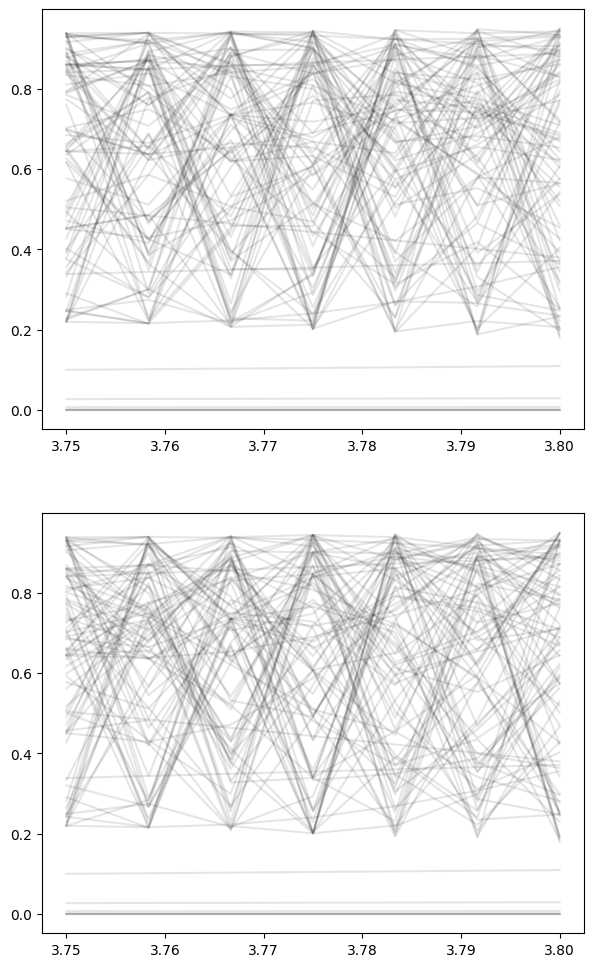

In [120]:
fig, (ax21, ax22)  = plt.subplots(2,1, figsize = (7,12))
x32 = np.full(n1, 1e-5, dtype=np.float32)
x64 = np.full(n1, 1e-5, dtype=np.float64)
for i in range(iterations1):
    
    x32 = logistic(r1, np.float32(x32))
    x64 = logistic(r1, np.float64(x64))
    # if i >= iterations1 - visibility:
    ax21.plot(r1, np.float32(x32), 'k', alpha=0.1)
    ax22.plot(r1, np.float32(x64), 'k', alpha=0.1)



### Zadanie 4.3

In [158]:
r = 4
n2 = 1000
# xx32 = np.linspace(3.75, 3.8, n1, dtype=np.float32)
xx32 = np.linspace(0.0, 1, 100, dtype=np.float32)
result1 = []
err = 1e-7

for j in range(len(xx32)):
    i = 0
    z = xx32[j]
    while True:
        i += 1
        z = np.float32(logistic(r, z))
        if z < err or i == 10000000:
            # print(f'{j/len(xx32) * 100}%')
            if i == 10000000:
                result1.append(float('inf'))
                break
            result1.append(i)
            break
            
# print(result1)

In [162]:
ziped_result = list(zip(xx32, result1))
print(ziped_result)

[(0.0, 1), (0.01010101, 3339), (0.02020202, 1533), (0.030303031, 2612), (0.04040404, 2560), (0.05050505, 2064), (0.060606062, 407), (0.07070707, 324), (0.08080808, 1998), (0.09090909, 4027), (0.1010101, 1038), (0.11111111, 896), (0.121212125, 1194), (0.13131313, inf), (0.14141414, 1230), (0.15151516, 2525), (0.16161616, 2856), (0.17171717, 1084), (0.18181819, 1923), (0.1919192, 1155), (0.2020202, 617), (0.21212122, 1991), (0.22222222, 5), (0.23232323, 3568), (0.24242425, 3658), (0.25252524, 174), (0.26262626, 2366), (0.27272728, inf), (0.28282827, inf), (0.2929293, 2409), (0.3030303, 1651), (0.3131313, 3147), (0.32323232, inf), (0.33333334, 897), (0.34343433, 2323), (0.35353535, 3922), (0.36363637, 3115), (0.37373737, 1349), (0.3838384, 1386), (0.3939394, 759), (0.4040404, 4339), (0.41414142, 1250), (0.42424244, 1297), (0.43434343, 1244), (0.44444445, 2014), (0.45454547, 2030), (0.46464646, 4063), (0.47474748, 3243), (0.4848485, 910), (0.4949495, 3825), (0.5050505, 3825), (0.5151515, 9